(Bayesian Linear Regression) Consider a toy data set consisting of 10 training examples {xn , yn }10
n=1 with
each input xn as well as the output yn being scalars. The data is given below.
x = [−2.23, −1.30, −0.42, 0.30, 0.33, 0.52, 0.87, 1.80, 2.74, 3.62];
y = [1.01, 0.69, −0.66, −1.34, −1.75, −0.98, 0.25, 1.57, 1.65, 1.51]
We would like to learn a Bayesian linear regression model using this data, assuming a Gaussian likelihood model
for the outputs with fixed noise precision β = 4. However, instead of working with the original scalar-valued
inputs, we will map each input x using a degree-k polynomial as φk (x) = [1, x, x2 , . . . , xk ]> . Note that, when
using the mapping φk , each original input becomes k + 1 dimensional. Denote the entire set of mapped inputs as
φk (x), a 10 × (k + 1) matrix. Consider k = 1, 2, 3 and 4, and learn a Bayesian linear regression model for each
case. Assume the following prior on the regression weights: p(w) = N (w|0, I) with w ∈ Rk+1 .


In [ ]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## 5.1

1. For each k, compute the posterior of w and show a plot with 10 random functions drawn from the inferred
posterior (show the functions for the input range x ∈ [−4, 4]). Also show the original training examples on
the same plot to illustrate how well the functions fit the training data.

In [ ]:
x = np.array( [ -2.23, -1.30, -0.42, 0.30, 0.33, 0.52, 0.87, 1.80, 2.74, 3.62 ] )
x = x.reshape( 1, len(x) ) # Shape : ( 1, n )
y = np.array( [ 1.01, 0.69, -0.66, -1.34, -1.75, -0.98, 0.25, 1.57, 1.65, 1.51 ] )
y = y.reshape( 1, len(y) ) # Shape : (1, n)
beta = 4 # Data Precision
n = x.shape[1]


In [ ]:
def convert_x_to_phi_x( x, k ):

  "Returns : A  (d = k) * n array "

  k_array = np.array( [  range(  k + 1 ) ] )
  k_array = np.transpose( k_array )
  d = k  + 1 # Number of features
  phi_x = np.power( x, k_array ) # Data Matrix with each column representing a single data

  return phi_x

In [ ]:
# Posterior ( P( w | y, phi_k(x)) ) is a Normal distribution due to conjugacy
def calculate_posterior_mean_var( k = 1, x = x, y = y, beta = 4, n = n ) :
  " Shape : X = (1 * n), y = (1, n) "

  # Prior is a Multi Variate Gaussian with mean 0 and Identity matrix as Co-variance
  # As the likelihood and the prior both are Gaussian, Posterior will also be Gaussian due to conjugacy
  d = k + 1
  phi_x = convert_x_to_phi_x( x, k )    # Shape : d * n
  posterior_mean = np.dot( inv( np.dot( phi_x, np.transpose( phi_x ) ) + ( 1 / beta ) * np.eye( d ) ), np.dot( phi_x, np.transpose(y) ) ) # Shape : d * 1
  posterior_co_var = inv( beta * np.dot( phi_x, np.transpose( phi_x ) ) + np.eye( d ) ) # Shape : d * d

  return ( posterior_mean, posterior_co_var )

In [ ]:
a, b = calculate_posterior_mean_var(2)
print(a.shape)
print(b.shape)

(3, 1)
(3, 3)


In [ ]:
def plot_sample_from_posterior( k = 1, x = x, y = y, beta = 4, n = n, number_of_sample_weights = 10 ):

  ( posterior_mean, posterior_cov ) = calculate_posterior_mean_var( k, x, y, beta, n )
  sample_weights = np.random.multivariate_normal( posterior_mean.flatten(), posterior_cov, size = number_of_sample_weights ) # Shape : number_of_sample_weights * d
  sample_weights = np.transpose (sample_weights) # Shape: d * number_of_sample_weights
  x_plot = np.linspace(-4, 4, 1000)
  phi_x_plot = convert_x_to_phi_x( x_plot, k )
  y_plot = np.dot( np.transpose(sample_weights), phi_x_plot )  # Shape : number_of_sample_weights * n
  for i in range(number_of_sample_weights) :
    plt.plot(x_plot, y_plot[i, :])
  plt.scatter(x, y, label = 'Training Samples', marker = 'x')
  plt.legend()
  plt.show()

The Linerar Regression Plot for k = 1


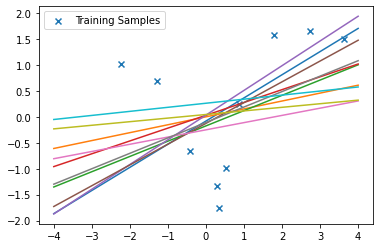

The Linerar Regression Plot for k = 2


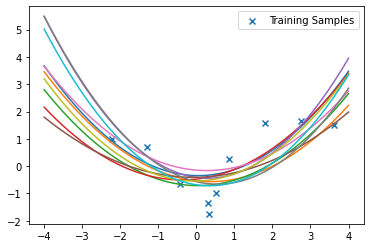

The Linerar Regression Plot for k = 3


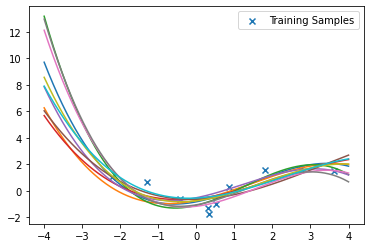

The Linerar Regression Plot for k = 4


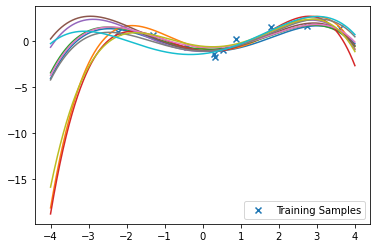

In [ ]:
for k in range(1, 5):
  print('The Linerar Regression Plot for k = ' + str(k))
  plot_sample_from_posterior(k = k, x = x, y = y, beta = 4, n = n, number_of_sample_weights = 10)

## 5.2

For each k, compute and plot the mean of the posterior predictive p(y∗ |$φ_k$ (x∗ ), $φ_k$ (x), y, β) on the interval
x∗ ∈ [−4, 4]. On the same plot, also show the predictive posterior mean plus-and-minus two times the
predictive posterior standard deviation.

The Posterior predictive distribution is compted as foillows :  \\
= p($y^∗ |φ_k (x^∗ ), φ_k (x), y, β)$ \\
= $ \int N(y^* | w^Tϕ_k(x_*), \beta^{-1} ) N(w | posteriorMmean, posteriorCoVarianceMatrix) dw $ \\
= $ N(y^* | (posteriorMean)^T \phi_k(x^*), \beta ^{(-1)} + \phi_k(x^*)^T posteriorCoVariance \phi_k(x^*)) $

In [ ]:
def calculate_ppd(phi_x_test, posterior_mean, posterior_cov, k = 1, beta = 4 ) :

  #phi_x_test = convert_x_to_phi_x ( test_x, k )
  assert phi_x_test.shape[0] == posterior_mean.shape[0]
  #print(phi_x_test.shape)
  #print(posterior_mean.shape)
  ppd_mean = np.dot( np.transpose( posterior_mean ), phi_x_test )
  ppd_var = np.diagonal( (1/beta ) + np.dot( np.transpose( phi_x_test ), np.dot( posterior_cov, phi_x_test )) )

  return (ppd_mean, ppd_var)

In [ ]:
def plot_ppd(k = 1, x = x, y = y, beta = 4, n = n):

  ( posterior_mean, posterior_co_var ) = calculate_posterior_mean_var( k = k, x = x, y = y, beta = 4, n = n )
  x_test = np.linspace( -4, 4, 1000 )
  phi_x_test = convert_x_to_phi_x ( x_test, k )
  (ppd_mean, ppd_var) = calculate_ppd( phi_x_test, posterior_mean, posterior_co_var, k = k )
  ppd_std_dev = np.sqrt(ppd_var)

  plt.figure(figsize=(10, 10))
  plt.plot( x_test, np.array(ppd_mean + 2 * ppd_std_dev).reshape(1000, ) , label = 'Twice PPD_Std_Deviation')
  plt.plot( x_test, np.array(ppd_mean - 2 * ppd_std_dev).reshape(1000, ), label = " Twice PPD Std Deviation" )
  plt.plot(x_test, ppd_mean.reshape(1000, ), label = "PPD Mean")
  plt.scatter (x, y, label = "Training Samples", marker = 'x')
  plt.legend()
  plt.show()
  return _


The Posterior Predictive Distribution plot for k = 1


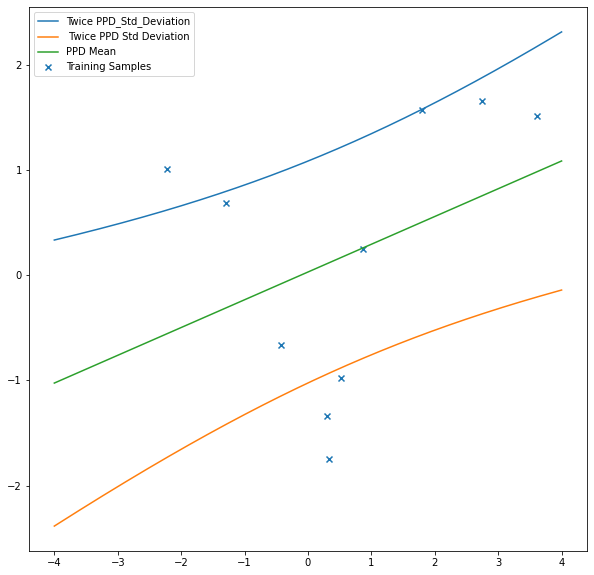

The Posterior Predictive Distribution plot for k = 2


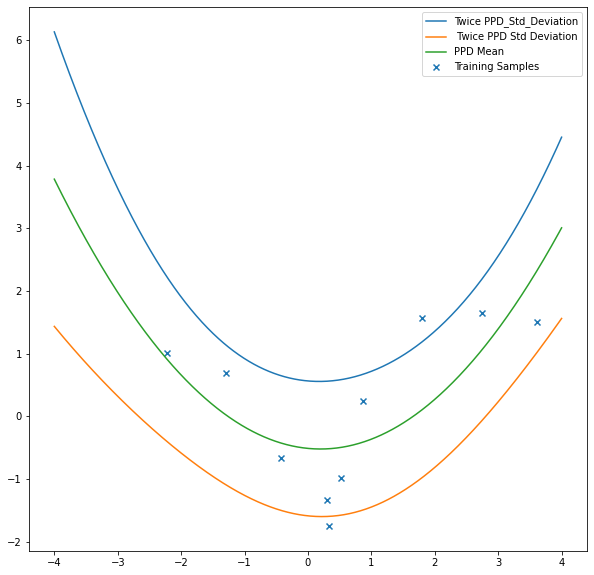

The Posterior Predictive Distribution plot for k = 3


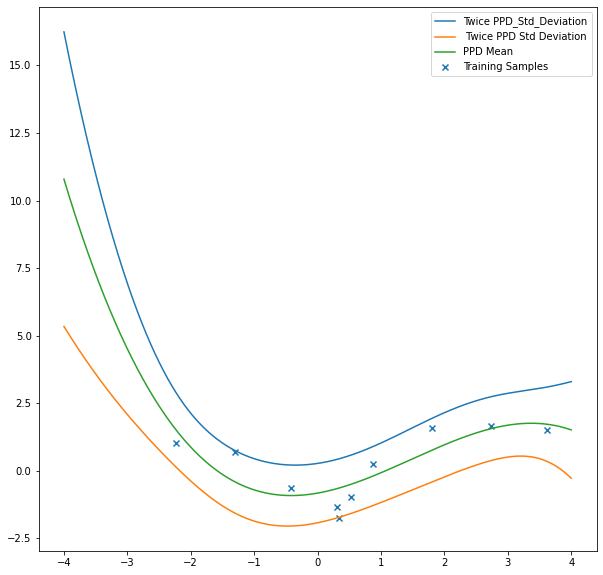

The Posterior Predictive Distribution plot for k = 4


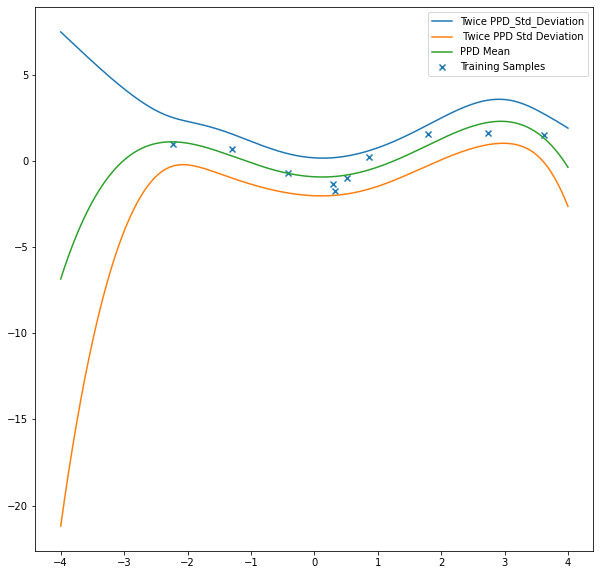

In [ ]:
for k in range(1, 5):
  print('The Posterior Predictive Distribution plot for k = ' + str(k))
  plot_ppd(k)

## 5.3

The marginal Log Likelihood can be computed as follows :
$
\ln p(y |\phi_k(x), \beta) \\
= \sum_{i = 1}^{n} \ln p(y_i | \phi_k(x_i), \beta))) \\
 = \sum_{i = 1}^{n} \ln \int p(y_i | \phi_k(x_i)), w ,\beta ) p(w | \mu_{posterior}, \Sigma_{posterior})dw \\
 = \sum_{i = 1}^{n} \ln p(y_i | \mu_{posterior}^T\phi_k(x_i), 1/\beta + \phi_k(x_i)^T \Sigma_{posterior} \phi_k(x_i)) \\
$

In [ ]:
def normal_prob( x, mean, var ):

  prob = ( 1 / np.sqrt( 2 * 3.14 * var) ) * np.exp( - np.square( x - mean ) / ( 2 * var ) )

  return prob

In [ ]:
def calculate_marginal_ll(k = 1, x = x, y = y, beta = 4, n = n ):

  ( posterior_mean, posterior_co_var ) = calculate_posterior_mean_var( k = k, x = x, y = y, beta = beta, n = n )
  phi_x = convert_x_to_phi_x( x, k )
  ll_mean = np.dot( np.transpose(posterior_mean), phi_x ) # Shape : 1 * n
  #print(ll_mean)
  ll_var = ( 1 / beta ) + np.diagonal( np.dot( np.transpose(phi_x), np.dot( posterior_co_var, phi_x ) ) ).reshape(1, n)
  #ll_std_dev = np.sqrt( ll_var )
  #print(ll_var)
  #print(ll_std_dev)
  p = normal_prob( y, ll_mean, ll_var )
  #print(p.shape)
  #print(p)
  #print(np.sum(p))
  #print(ll_mean.shape)
  #print(ll_std_dev.shape)
  #print(ll_var.shape)
  ln_p = np.log( p )
  result = np.sum( ln_p )

  return result

In [ ]:
for k in range( 1, 5 ):

  marginal_ll = calculate_marginal_ll( k, x, y)
  print('The Log Marginal Likelihood for k = ' + str(k) + ' is ' + str(marginal_ll) )

The Log Marginal Likelihood for k = 1 is -25.118714197782616
The Log Marginal Likelihood for k = 2 is -14.231056701070727
The Log Marginal Likelihood for k = 3 is -10.578014163246863
The Log Marginal Likelihood for k = 4 is -7.874323490283474


From the above result, we can see that the Log Marginal Likelihood is maximum when k = 4. Thus, we can understand that the marginal likelihood is maximum for k = 4, as log is a strictly monotonic function. And if the marginal likelihood is maximum, it implies that the observed data is highly likely with the weight vector estimated in the higher dimension. We can also see that as the dimension of the ernel space increases, the regression line fit the data in a more nicer way.

## 5.4

Using the MAP estimate wM AP , Compute the log likelihood log p(y|wM AP , φk (x), β) for each k. Which
of these 4 models seems to have the highest log likelihood? Is your answer the same as that based on
the log marginal likelihood (part 3)? Which of these two criteria (highest log likelihood or highest log
marginal likelihood) do you think is more reasonable to select the best model and why?

As we know, that the likelihood and the prior are normal distribution and conjugate, the posterior distribution is also normal. And we know that the mean and mode of a normal distribution are same. Thus $w_{MAP}$ estimate will be same as the mean of the Posterior Gaussian Distribution.

In [ ]:
def calculate_ll_with_w_map( k = 1, x = x, y = y, beta = 4, n = n ):

  ( posterior_mean, posterior_co_var ) = calculate_posterior_mean_var( k = k, x = x, y = y, beta = beta, n = n )
  w_map = posterior_mean # Mean and Mode are same for Gaussian Distribution
  phi_x = convert_x_to_phi_x( x, k )
  ll_mean = np.dot( np.transpose(w_map), phi_x ) # Shape : 1 * n
  ll_var = ( 1 / beta )
  p = normal_prob( y, ll_mean, ll_var )
  ln_p = np.log( p )
  result = np.sum( ln_p )

  return result

In [ ]:
for k in range( 1, 5 ):

  log_ll_w_map = calculate_ll_with_w_map( k, x, y)
  print('The Log Likelihood for k = ' + str(k) + ' with w_MAP is ' + str(log_ll_w_map) )

The Log Likelihood for k = 1 with w_MAP is -28.09146894942936
The Log Likelihood for k = 2 with w_MAP is -15.358128229406027
The Log Likelihood for k = 3 with w_MAP is -10.93331145396955
The Log Likelihood for k = 4 with w_MAP is -7.222755829382391


From the above we can also see that the log likelihood is max for k = 4. And therefore k = 4 causes the regression line to fit best. \\
In our case, the answer of both the maximization of marginal likelihood and log likelihood are almost same, because the mean and mode of a Gaussian Distribution is same. Thus likelihood mean in both the case ( Log Marginal and Log Likelihood )are same, though the variance is different. \\
The Maximization of marinal likelihood is the best way to select a model, because the marginal likelihood marginalizes the likelihood wrt all the weight vectors sampled from the posterior distribution, which results in finding the probability from a normal distribution with a mean weight as mean of the posterior and input specific variance. However, the maximization of the Likelihood wrt w_MAP, is only considering a single estimate of weight, which is the mode of the posterior instead of using the full Posterior distribution. Thus, the $\textbf{marginal likelihood is the best approach for model selection}$.



## 5.5

From the graph of the best model, we can see that the variance is maximum towards the end of both the curve. If we want to insert new data points, we shall be inserting that in the postion where the posterior predictive distribution has more variance. Andhere the posterior predictive distance has more variance towards left end point i.e. $x^* = -4$. We shall insert a new data points towards that range. In the below code, we have added a new data pint at $x^* = -4$, and have drawn the PPD after and before insertion, and we can se that the PPD Variance has reduced significantly, by introducing that.

PPD before insertingnew point for k = 4


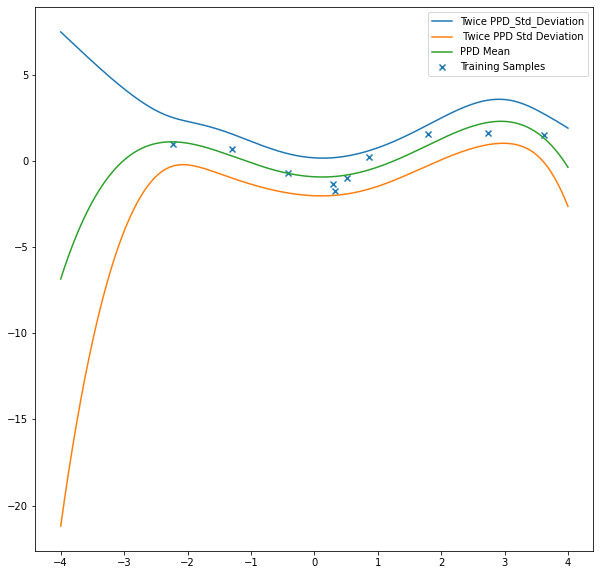

PPD after inserting the new point at x^* = -4 with y = 1.1


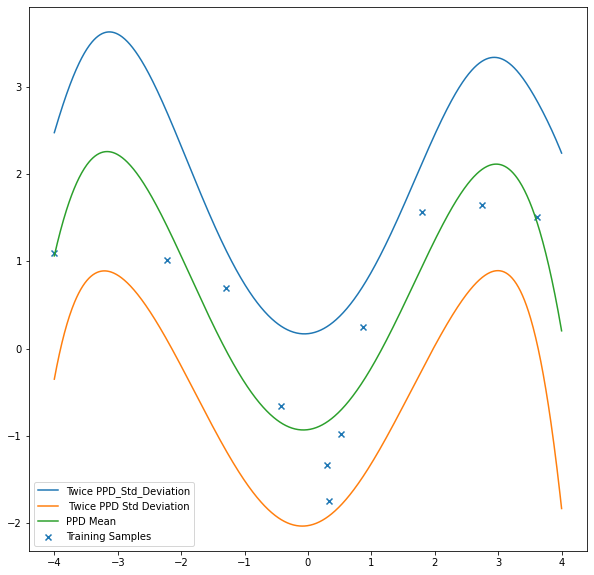

''

In [ ]:
k_best = 4 # Best Model
#PPD before insertingnew point for k = 4
print("PPD before insertingnew point for k = 4")
plot_ppd(k = 4, x = x, y = y, beta = 4, n = n)
# Inserting new data point at the place x_* = -4, where variance is maximum
x_new = np.insert(x[0], 0 , -4 )
y_new = np.insert( y[0], 0 , 1.1 )
print("PPD after inserting the new point at x^* = -4 with y = 1.1")
plot_ppd(k = 4, x = x_new, y = y_new, beta = 4, n = n+1)


We can see from the above plot that inserting the data points at the last end, the variance of the posterior prediction or uncertainty has reduced. Thus it has improved the model's robustness.